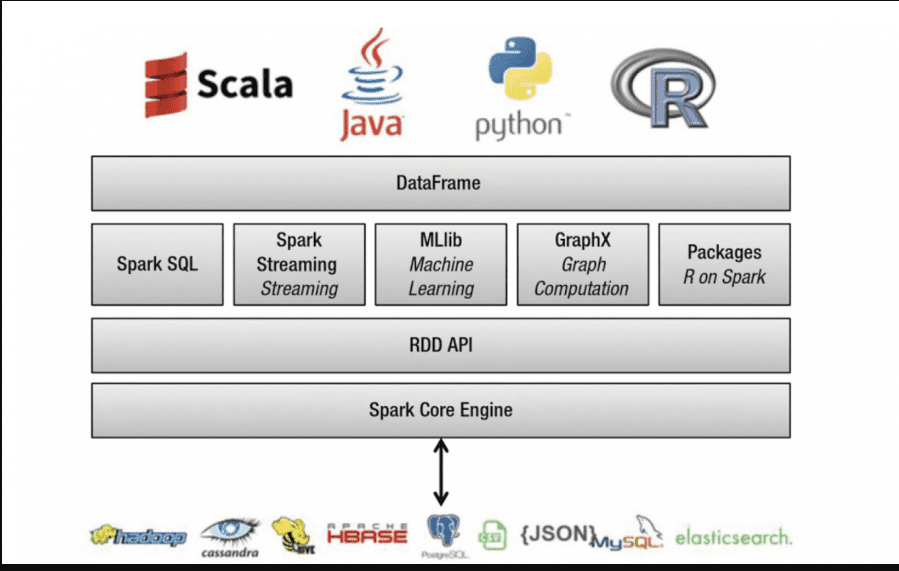

In [5]:
from PIL import Image
from IPython.display import display

# Replace 'image_path' with the actual path to your image file
image_path = "../database/01.png"
image = Image.open(image_path)
display(image)


# <font color=yellow>Spark SQL, DataFrames and Datasets </font>

### Spark Session

### <font color=red>Different ways to create spark session</font>

- The entry point into all functionality in Spark is the SparkSession class.
- To create a basic SparkSession, just use SparkSession.builder.

- SparkSession in Spark 2.0 provides builtin support for Hive features including the ability to write 
  queries using HiveQL, access to Hive UDFs, and the ability to read data from Hive tables. 
- To use these features, you do not need to have an existing Hive setup.

In [6]:
# Default SparkSession (No Configuration):

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

23/08/05 12:35:45 WARN Utils: Your hostname, tulasiram-Inspiron-14-5420 resolves to a loopback address: 127.0.1.1; using 192.168.1.7 instead (on interface wlp0s20f3)
23/08/05 12:35:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [1]:
# Setting Application Name:

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("My Spark Application").getOrCreate()


23/08/03 19:23:38 WARN Utils: Your hostname, tulasiram-Inspiron-14-5420 resolves to a loopback address: 127.0.1.1; using 192.168.1.5 instead (on interface wlp0s20f3)
23/08/03 19:23:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
# Configuring Spark Session:

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("My Spark Application") \
    .config("spark.executor.memory", "2g") \
    .config("spark.driver.memory", "2g") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


23/08/03 14:48:39 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
# Specifying Spark Master:

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("My Spark Application") \
    .master("local[*]") \ 
    .config()
    .getOrCreate()


In [5]:
# Using Hadoop Configuration:
# If you have an existing Hadoop configuration, you can use it with Spark by setting the 
# HADOOP_CONF_DIR environment variable before starting the SparkSession:

import os
from pyspark.sql import SparkSession

os.environ['HADOOP_CONF_DIR'] = '/path/to/hadoop/conf'
spark = SparkSession.builder.appName("My Spark Application").getOrCreate()


In [1]:
# Using an Existing SparkContext (if applicable):

# from pyspark.sql import SparkSession
# from pyspark import SparkContext

#sc = SparkContext(appName="My Spark Application")
#spark = SparkSession(sc)


In [12]:
#from pyspark import SparkContext, SparkConf
#conf = SparkConf().setAppName("My Spark Application").setMaster("local[*]")
#sc = SparkContext(conf=conf)

In [2]:
from pyspark.sql import SparkSession

# Create a new SparkSession
def create_spark_session(app_name, config_options=None):
    spark = SparkSession.builder.appName(app_name)
    
    if config_options:
        for key, value in config_options.items():
            spark = spark.config(key, value)
    
    return spark.getOrCreate()

# Example usage:
config_options = {
    "spark.some.config.option": "some-value",
    "spark.executor.memory": "2g",
    "spark.driver.memory": "2g"
}

spark = create_spark_session(app_name="My Spark Session", config_options=config_options)

# Verify that the SparkSession is created successfully
print(spark.version)


3.4.1


- <font color=red>from pyspark.sql import SparkSession: </font>
- This line imports the SparkSession class from the pyspark.sql module. 
- It is the entry point to any Spark functionality related to structured data processing.

- <font color=red>spark = SparkSession.builder: </font>
- This starts the process of creating a new SparkSession using the builder pattern.

- <font color=red>.appName("Python Spark SQL basic example"): </font>
- Sets the application name for the Spark job, which is useful for identifying it in the Spark UI.

- <font>.config("spark.some.config.option", "some-value"): </font>
- Configures additional Spark settings. Here, you are setting a custom configuration option called 
   "spark.some.config.option" with the value "some-value." 

- <font color=red>.getOrCreate(): </font>
- This method tries to get an existing SparkSession if one already exists or creates a new one if none exists.

### <font color = red>Creating DataFrames</font>

In [14]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  4|5.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



In [19]:
# From a List or Pandas DataFrame:
from pyspark.sql import SparkSession
import pandas as pd

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# From a list of tuples
data = [("Alice", 34), ("Bob", 45), ("Eve", 28)]
columns = ["Name", "Age"]
df_from_list = spark.createDataFrame(data, columns)

# From a Pandas DataFrame
pandas_df = pd.DataFrame(data, columns=columns)
df_from_pandas = spark.createDataFrame(pandas_df)

df_from_pandas.show()

+-----+---+
| Name|Age|
+-----+---+
|Alice| 34|
|  Bob| 45|
|  Eve| 28|
+-----+---+



In [18]:
# Using SQL Queries:

# Create a temporary view from a list of tuples or a Pandas DataFrame
spark.createDataFrame(data, columns).createOrReplaceTempView("my_temp_view")

# Run SQL query on the temporary view
df_from_sql = spark.sql("SELECT * FROM my_temp_view WHERE Age > 30")

df_from_sql.show()


+-----+---+
| Name|Age|
+-----+---+
|Alice| 34|
|  Bob| 45|
+-----+---+



In [1]:
# using rdd
from pyspark import SparkContext
from pyspark.sql import SparkSession

# Create a SparkContext and SparkSession
sc = SparkContext(appName="MySparkApp")
spark = SparkSession(sc)

# Create an RDD
rdd = sc.parallelize([(1, "Alice"), (2, "Bob"), (3, "Eve")])

# Convert RDD to DataFrame
columns = ["ID", "Name"]
df_from_rdd = spark.createDataFrame(rdd, columns)


23/08/03 18:11:38 WARN Utils: Your hostname, tulasiram-Inspiron-14-5420 resolves to a loopback address: 127.0.1.1; using 192.168.1.5 instead (on interface wlp0s20f3)
23/08/03 18:11:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


### <font color="red"> Exploratory Data Analysis</font>

In [6]:
pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/d0/28/88b81881c056376254618fad622a5e94b5126db8c61157ea1910cd1c040a/pandas-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 3.1 MB/s eta 0:00:003.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 3.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Obtaining dependency information for numpy>=1.21.0 from https://files.pythonhosted.org/packages/32/6a/65dbc57a89078af9ff8bfcd4c0761a50172d90192eaeb1b6f56e5fbf1c3d/numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 5.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 5.0 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

pandas_df = pd.read_csv("/home/tulasiram/Documents/PySpark_Projects/pyspark_learning/car_data.csv")

pandas_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("My Spark Application").getOrCreate()

df = spark.createDataFrame(pandas_df)

In [9]:
df.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

In [10]:
df.take()

[Row(Car_Name='ritz', Year=2014, Selling_Price=3.35, Present_Price=5.59, Kms_Driven=27000, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='sx4', Year=2013, Selling_Price=4.75, Present_Price=9.54, Kms_Driven=43000, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='ciaz', Year=2017, Selling_Price=7.25, Present_Price=9.85, Kms_Driven=6900, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='wagon r', Year=2011, Selling_Price=2.85, Present_Price=4.15, Kms_Driven=5200, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='swift', Year=2014, Selling_Price=4.6, Present_Price=6.87, Kms_Driven=42450, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='vitara brezza', Year=2018, Selling_Price=9.25, Present_Price=9.83, Kms_Driven=2071, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=

In [6]:
df.printSchema()

root
 |-- Car_Name: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Selling_Price: double (nullable = true)
 |-- Present_Price: double (nullable = true)
 |-- Kms_Driven: long (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Seller_Type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Owner: long (nullable = true)



In [7]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
df

Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.6,6.87,42450,Diesel,Dealer,Manual,0
vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
s cross,2015,6.5,8.61,33429,Diesel,Dealer,Manual,0
ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [8]:
df.show(1, vertical=True)

-RECORD 0---------------
 Car_Name      | ritz   
 Year          | 2014   
 Selling_Price | 3.35   
 Present_Price | 5.59   
 Kms_Driven    | 27000  
 Fuel_Type     | Petrol 
 Seller_Type   | Dealer 
 Transmission  | Manual 
 Owner         | 0      
only showing top 1 row



In [9]:
df.columns

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [12]:
df.describe().show()

23/08/03 18:40:33 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|summary|Car_Name|              Year|    Selling_Price|    Present_Price|       Kms_Driven|Fuel_Type|Seller_Type|Transmission|              Owner|
+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|  count|     301|               301|              301|              301|              301|      301|        301|         301|                301|
|   mean|   800.0|2013.6279069767443|4.661295681063123|7.628471760797343|36947.20598006644|     null|       null|        null|0.04318936877076412|
| stddev|    null|2.8915541273366725|5.082811556177803|8.644115402015787|38886.88388206787|     null|       null|        null|0.24791489269491965|
|    min|     800|              2003|              0.1|             0.32|              500|      CNG|     Dealer|   Au

In [10]:
df.select("Car_Name", "Year", "Selling_Price").describe().show()

+-------+--------+------------------+-----------------+
|summary|Car_Name|              Year|    Selling_Price|
+-------+--------+------------------+-----------------+
|  count|     301|               301|              301|
|   mean|   800.0|2013.6279069767443|4.661295681063123|
| stddev|    null|2.8915541273366725|5.082811556177803|
|    min|     800|              2003|              0.1|
|    max|   xcent|              2018|             35.0|
+-------+--------+------------------+-----------------+



DataFrame.collect() collects the distributed data to the driver side as the local data in Python. Note that this can throw an out-of-memory error when the dataset is too large to fit in the driver side because it collects all the data from executors to the driver side.



In [13]:
df.collect()

[Row(Car_Name='ritz', Year=2014, Selling_Price=3.35, Present_Price=5.59, Kms_Driven=27000, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='sx4', Year=2013, Selling_Price=4.75, Present_Price=9.54, Kms_Driven=43000, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='ciaz', Year=2017, Selling_Price=7.25, Present_Price=9.85, Kms_Driven=6900, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='wagon r', Year=2011, Selling_Price=2.85, Present_Price=4.15, Kms_Driven=5200, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='swift', Year=2014, Selling_Price=4.6, Present_Price=6.87, Kms_Driven=42450, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='vitara brezza', Year=2018, Selling_Price=9.25, Present_Price=9.83, Kms_Driven=2071, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=

In [15]:
df.take(5)

[Row(Car_Name='ritz', Year=2014, Selling_Price=3.35, Present_Price=5.59, Kms_Driven=27000, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='sx4', Year=2013, Selling_Price=4.75, Present_Price=9.54, Kms_Driven=43000, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='ciaz', Year=2017, Selling_Price=7.25, Present_Price=9.85, Kms_Driven=6900, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='wagon r', Year=2011, Selling_Price=2.85, Present_Price=4.15, Kms_Driven=5200, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='swift', Year=2014, Selling_Price=4.6, Present_Price=6.87, Kms_Driven=42450, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0)]

In [16]:
df.toPandas()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Selecting and accessing the data

In [18]:
new_df = df.Car_Name
df[""]

Column<'Car_Name'>

In [ ]:
df[df.column_name].head()

In [19]:
df.select(df.Selling_Price).show()

+-------------+
|Selling_Price|
+-------------+
|         3.35|
|         4.75|
|         7.25|
|         2.85|
|          4.6|
|         9.25|
|         6.75|
|          6.5|
|         8.75|
|         7.45|
|         2.85|
|         6.85|
|          7.5|
|          6.1|
|         2.25|
|         7.75|
|         7.25|
|         7.75|
|         3.25|
|         2.65|
+-------------+
only showing top 20 rows



In [25]:
df.filter(df.Kms_Driven <= 50000).show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

### Applying a Function

PySpark supports various UDFs and APIs to allow users to execute Python native functions. See also the latest Pandas UDFs and Pandas Function APIs. For instance, the example below allows users to directly use the APIs in a pandas Series within Python native function.

In [27]:
import pandas as pd
from pyspark.sql.functions import pandas_udf

@pandas_udf('long')
def pandas_plus_one(series: pd.Series) -> pd.Series:
    # Simply plus one by using pandas Series.
    return series + 1

df.select(pandas_plus_one(df.Selling_Price)).show()

+------------------------------+
|pandas_plus_one(Selling_Price)|
+------------------------------+
|                             4|
|                             5|
|                             8|
|                             3|
|                             5|
|                            10|
|                             7|
|                             7|
|                             9|
|                             8|
|                             3|
|                             7|
|                             8|
|                             7|
|                             3|
|                             8|
|                             8|
|                             8|
|                             4|
|                             3|
+------------------------------+
only showing top 20 rows



Another example is DataFrame.mapInPandas which allows users directly use the APIs in a pandas DataFrame without any restrictions such as the result length.

In [28]:
def pandas_filter_func(iterator):
    for pandas_df in iterator:
        yield pandas_df[pandas_df.Selling_Price == 3]

df.mapInPandas(pandas_filter_func, schema=df.schema).show()

+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|   swift|2011|          3.0|         4.99|     20000|   Petrol|     Dealer|      Manual|    0|
|alto k10|2016|          3.0|         3.76|     10079|   Petrol|     Dealer|      Manual|    0|
|    brio|2012|          3.0|         5.35|     53675|   Petrol|     Dealer|      Manual|    0|
|    city|2009|          3.0|         10.0|     69562|   Petrol|     Dealer|      Manual|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+



### Grouping Data

In [29]:
df.groupby('Selling_Price').avg().show()

+-------------+------------------+------------------+------------------+------------------+-------------------+
|Selling_Price|         avg(Year)|avg(Selling_Price)|avg(Present_Price)|   avg(Kms_Driven)|         avg(Owner)|
+-------------+------------------+------------------+------------------+------------------+-------------------+
|         8.75|            2016.0|              8.75|              8.89|           20273.0|                0.0|
|          6.1|            2015.0|               6.1|              7.71|           26000.0|                0.0|
|         3.35|            2011.5|              3.35|             8.295|           57467.0|                0.0|
|         2.85|2014.6666666666667|              2.85|               3.9|10778.333333333334|                0.0|
|         9.25|            2015.0|              9.25|13.226666666666667|25357.333333333332|                0.0|
|          6.5|            2016.0|               6.5|             8.655|           27314.5|             

### Getting Data In/Out¶

In [33]:
# df.write.csv('data.csv', header=True)
#  spark.read.csv('data.csv', header=True).show()

### Working with SQL

In [35]:
df.createOrReplaceTempView("tableA")
spark.sql("SELECT count(*) from tableA").show()

+--------+
|count(1)|
+--------+
|     301|
+--------+



In [36]:
spark.sql("select * from tableA").show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu